**PYWINTER READ AND WRITE INTERMEDIATE FILE**

Example reading intermediate file and create a new intermediate file

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/PWINTER/sample_data/
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/PWINTER/sample_data
/content/drive/My Drive/PWINTER/sample_data


In [2]:
pip install pywinter

In [13]:
import numpy
import matplotlib.pyplot as plt
import pywinter.winter as pyw

In [14]:
pathfile = 'ERA5:2015-07-27_12'

In [15]:
interf = pyw.rinter(pathfile)

In [16]:
print(interf.keys())

dict_keys(['SOILHGT', 'SST', 'TT', 'RH', 'PSFC', 'UU', 'SM', 'SKINTEMP', 'VV', 'LANDSEA', 'PMSL', 'ST', 'HGT', 'TT2M', 'RH2M', 'UU10M', 'VV10M'])


In [17]:
print(interf['TT'].general)

{'VERSION': 5, 'HDATE': '2015-07-27_12:00:00', 'XFCST': 0.0, 'MAP_SOURCE': 'ECMWF', 'FIELD': 'TT', 'UNITS': 'K', 'DESC': 'Temperature', 'XLVL': '1000', 'NX': 441, 'NY': 329, 'EARTH_RADIUS': 6367.47021484375, 'IS_WIND_EARTH_REL': False}


In [18]:
print(interf['TT'].geoinfo)

{'IPROJ': 0, 'PROJ': 'Cylindrical Equidistant (0)', 'STARTLOC': 'SWCORNER', 'STARTLAT': 38.0, 'STARTLON': -130.0, 'DELTALAT': -0.25, 'DELTALON': 0.25}


In [19]:
print(interf['TT'].val.shape)

(31, 329, 441)


In [20]:
print(interf['TT'].level)

[100000.  97500.  95000.  92500.  90000.  87500.  85000.  82500.  80000.
  77500.  75000.  70000.  65000.  60000.  55000.  50000.  45000.  40000.
  35000.  30000.  25000.  20000.  17500.  15000.  12500.  10000.   7000.
   5000.   3000.   2000.   1000.]


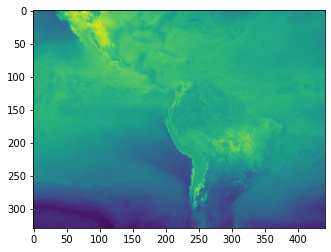

In [22]:
# QUICK DATA VIEW
plt.imshow(interf['TT'].val[0,:,:])

In [23]:
stlat = interf['TT'].geoinfo['STARTLAT']
stlon = interf['TT'].geoinfo['STARTLON']
dlat = interf['TT'].geoinfo['DELTALAT']
dlon = interf['TT'].geoinfo['DELTALON']

print(stlat,' ',stlon,' ',dlat,' ',dlon)

38.0   -130.0   -0.25   0.25


In [25]:
geo = pyw.Geo0(stlat,stlon,dlat,dlon)

In [30]:
tt = pyw.V3dp('TT',interf['TT'].val,interf['TT'].level)
rh = pyw.V3dp('RH',interf['RH'].val,interf['RH'].level)

varlist = [tt,rh]

pyw.cinter('FILE','2015-07-27_12',geo,varlist)

FILE:2015-07-27_12
